# World map of AI Ethics Guidelines

Visualizes data from [AI Ethics Guidelines Global Inventory](https://inventory.algorithmwatch.org/) by Algorithmwatch. Last update of the data repository is April 2020 but still an insteresting source. 

In [1]:
import pandas as pd
import geopandas
# work on example data...
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [2]:
guides = pd.read_csv('data/guides_countries.csv')

In [3]:
guides.head()

,Unnamed: 0,name,n_guides
0,0,Fiji,NaN
1,1,Tanzania,NaN
2,2,W. Sahara,NaN
3,3,Canada,6.0
4,4,United States of America,44.0


In [4]:
#world = world.join(guides['n_guides'].fillna(0))
world = world.join(guides['n_guides'])

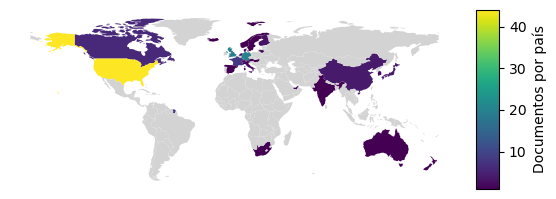

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

ax=world.plot(column='n_guides', 
              ax=ax, cax=cax, 
              missing_kwds={'color': 'lightgrey', "label": "No data"}, 
              legend=True,
              legend_kwds={'label': "Documentos por país"}
               );

ax.set_axis_off();

fig.savefig("pics/guides_map.pdf", bbox_inches='tight')
fig.savefig("pics/guides_map.png", bbox_inches='tight',  dpi=600)

/home/javi/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/javi/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


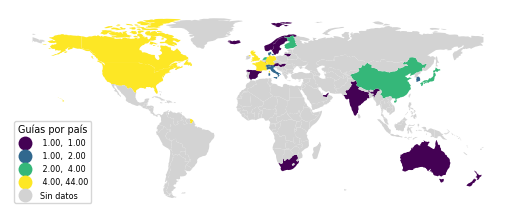

In [12]:

fig, ax = plt.subplots(1, 1)

ax=world.plot(column='n_guides', 
              ax=ax, 
              missing_kwds={'color': 'lightgrey', "label": "Sin datos"}, 
              figsize=(15, 10),
              #cmap='OrRd', 
              scheme='quantiles',
              legend=True, 
              legend_kwds={'loc': 'lower left', 'fontsize':'xx-small'});
                #legend_kwds={'loc': 'lower left', 'fontsize':8});

ax.legend_.set_title('Guías por país',prop={'size':'x-small'})

ax.set_axis_off();

fig.savefig("pics/guides_map_quantiles.pdf", bbox_inches='tight')
fig.savefig("pics/guides_map_quantiles.png", bbox_inches='tight',  dpi=600)

/home/javi/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/javi/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


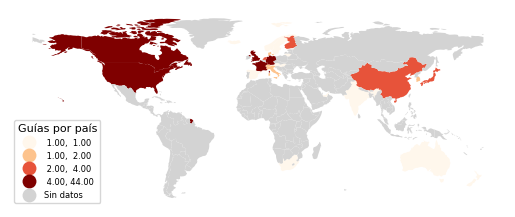

In [13]:

fig, ax = plt.subplots(1, 1)

ax=world.plot(column='n_guides', 
              ax=ax, 
              missing_kwds={'color': 'lightgrey', "label": "Sin datos"}, 
              figsize=(15, 10),
              cmap='OrRd', 
              scheme='quantiles', # 'fisher_jenks'
              legend=True, 
              legend_kwds={'loc': 'lower left', 'fontsize':'xx-small'});
);

ax.legend_.set_title('Guías por país',prop={'size':'x-small'})

ax.set_axis_off();

fig.savefig("pics/guides_map_quantiles_OrRd.pdf", bbox_inches='tight')
fig.savefig("pics/guides_map_quantiles_OrRd.png", bbox_inches='tight',  dpi=600)